In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder

In [231]:
df=pd.read_csv('/content/train (1).csv',usecols=['Age','Fare','Survived'])

In [232]:
df.dropna(inplace=True)

In [233]:
x=df.iloc[:,1:]
y=df.iloc[:,0]


In [234]:
x_tr,x_te,y_tr,y_te= train_test_split(x,y,test_size=0.2,random_state=42)

In [235]:
x_tr

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000
...,...,...
92,46.0,61.1750
134,25.0,13.0000
337,41.0,134.5000
548,33.0,20.5250


In [236]:
clf=DecisionTreeClassifier()
clf.fit(x_tr,y_tr)

DecisionTreeClassifier()

In [237]:
y_pre=clf.predict(x_te)

In [238]:
accuracy_score(y_te,y_pre)

0.6293706293706294

In [239]:
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

np.float64(0.6344874804381846)

In [240]:
kbin_age=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare=KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [241]:
trf=ColumnTransformer([
    ('fir',kbin_age,[0]),
    ('sec',kbin_fare,[1])
],remainder='passthrough')


In [242]:
x_tr_tf=trf.fit_transform(x_tr)

x_te_tf=trf.transform(x_te)

In [243]:
trf.named_transformers_['fir'].n_bins_

array([15])

In [244]:
trf.named_transformers_['fir'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [245]:
trf.named_transformers_['sec'].bin_edges_

array([array([  0.    ,   7.25  ,   7.775 ,   7.8958,   8.1583,  10.5   ,
               13.    ,  14.4542,  18.75  ,  26.    ,  26.55  ,  31.275 ,
               51.4792,  76.2917, 108.9   , 512.3292])                   ],
      dtype=object)

In [246]:
op=pd.DataFrame({
    'age':x_tr['Age'],
    'age_trf':x_tr_tf[:,0],
    'fare':x_tr['Fare'],
    'fare_trf':x_tr_tf[:,1]
})
op['Agelab']=pd.cut(x=x_tr['Age'],bins=trf.named_transformers_['fir'].bin_edges_[0].tolist())
op['Farelab']=pd.cut(x=x_tr['Fare'],bins=trf.named_transformers_['sec'].bin_edges_[0].tolist())

In [247]:
op.sample(5)

,age,age_trf,fare,fare_trf,Agelab,Farelab
754,48.0,13.0,65.0000,12.0,"(47.0, 54.0]","(51.479, 76.292]"
342,28.0,7.0,13.0000,6.0,"(25.0, 28.0]","(10.5, 13.0]"
514,24.0,5.0,7.4958,1.0,"(23.0, 25.0]","(7.25, 7.775]"
848,28.0,7.0,33.0000,11.0,"(25.0, 28.0]","(31.275, 51.479]"
728,25.0,6.0,26.0000,9.0,"(23.0, 25.0]","(18.75, 26.0]"


In [248]:
x_tr_tf

array([[ 8.,  8.],
       [ 6.,  7.],
       [ 8.,  7.],
       ...,
       [11., 14.],
       [ 9.,  8.],
       [ 9.,  3.]])

In [249]:
clf=DecisionTreeClassifier()
clf.fit(x_tr_tf,y_tr)
y_pre1=clf.predict(x_te_tf)
accuracy_score(y_te,y_pre1)

0.6363636363636364

# func

In [250]:
def Discretize(bins,strategy):
  kbin_age=KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
  kbins_Fare=KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
  trf=ColumnTransformer([
    ('fir',kbin_age,[0]),
    ('sec',kbins_Fare,[1])
  ],remainder='passthrough')
  x_tr_tf1=trf.fit_transform(x)
  print(np.mean(cross_val_score(DecisionTreeClassifier(),x_tr_tf1,y,cv=10,scoring='accuracy')))
  plt.figure(figsize=(14,4))
  plt.subplot(121)
  plt.hist(x['Age'])
  plt.title('before')
  plt.subplot(122)
  plt.hist(x_tr_tf1[:,0],color='red')
  plt.title('After')
  plt.show()
  plt.figure(figsize=(14,4))
  plt.subplot(121)
  plt.hist(x['Fare'])
  plt.title('before')
  plt.subplot(122)
  plt.hist(x_tr_tf1[:,1],color='red')
  plt.title('After')
  plt.show()



0.6723982785602504


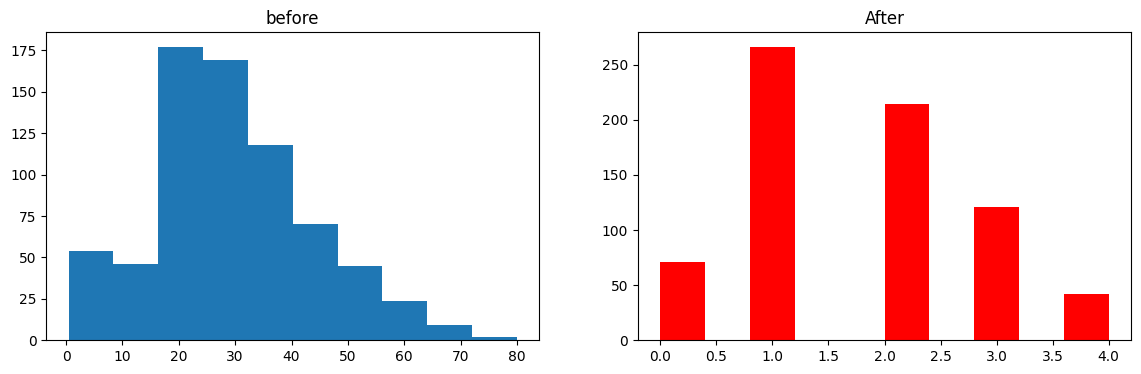

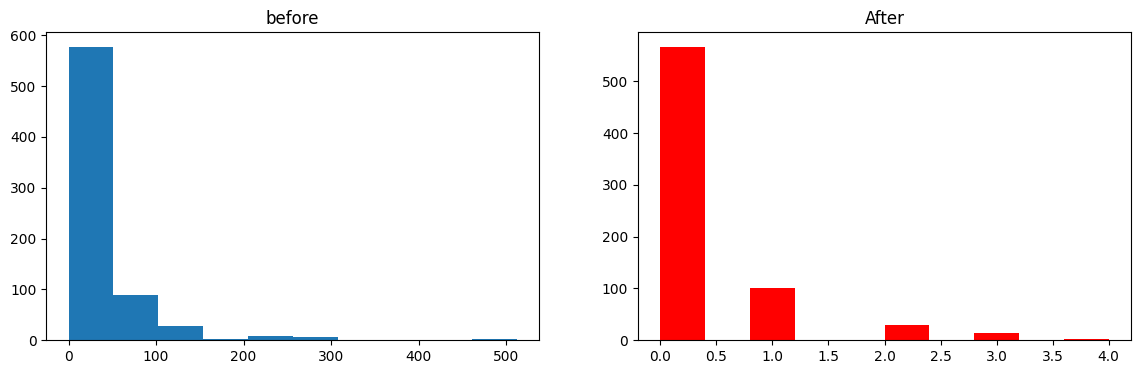

In [251]:
Discretize(5,'kmeans')

# Binarization

In [252]:
f1 = pd.read_csv('/content/train (1).csv', usecols=['Age', 'SibSp', 'Parch', 'Survived','Fare'])

In [253]:
f1

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500
...,...,...,...,...,...
886,0,27.0,0,0,13.0000
887,1,19.0,0,0,30.0000
888,0,NaN,1,2,23.4500
889,1,26.0,0,0,30.0000


In [254]:

f1.dropna(inplace=True)

In [255]:
f1['Family']=f1['SibSp']+f1['Parch']

In [256]:
f1=f1.drop(columns=['SibSp','Parch'])

In [257]:
f1


,Survived,Age,Fare,Family
0,0,22.0,7.2500,1
1,1,38.0,71.2833,1
2,1,26.0,7.9250,0
3,1,35.0,53.1000,1
4,0,35.0,8.0500,0
...,...,...,...,...
885,0,39.0,29.1250,5
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
889,1,26.0,30.0000,0


In [258]:
x=f1.iloc[:,1:]
y=f1.iloc[:,0]


In [259]:
x_tr1,x_te1,y_tr1,y_te1= train_test_split(x,y,test_size=0.2,random_state=42)

In [260]:
x_tr1

,Age,Fare,Family
328,31.0,20.5250,2
73,26.0,14.4542,1
253,30.0,16.1000,1
719,33.0,7.7750,0
666,25.0,13.0000,0
...,...,...,...
92,46.0,61.1750,1
134,25.0,13.0000,0
337,41.0,134.5000,0
548,33.0,20.5250,2


In [261]:

# Define and train the DecisionTreeClassifier
clf2 = DecisionTreeClassifier()
clf2.fit(x_tr1, y_tr1)

# Make predictions on the test set
y_pre2 = clf2.predict(x_te1)

# Calculate accuracy
accuracy = accuracy_score(y_te1, y_pre2)
print("Accuracy:", accuracy)

Accuracy: 0.6223776223776224


In [262]:
from sklearn.preprocessing import Binarizer

In [263]:
trf1=ColumnTransformer([
    ('bin',Binarizer(threshold=0,copy=False),[-1])
],remainder='passthrough')

In [264]:
x_tr_tf1=trf1.fit_transform(x_tr1)
x_te_tf1=trf1.transform(x_te1)

In [265]:
clf2=DecisionTreeClassifier()
clf2.fit(x_tr_tf1 , y_tr1)
y_pre2=clf2.predict(x_te_tf1)
accuracy_score(y_te1,y_pre2)

0.5944055944055944

In [266]:
x_tr1

,Age,Fare,Family
328,31.0,20.5250,2
73,26.0,14.4542,1
253,30.0,16.1000,1
719,33.0,7.7750,0
666,25.0,13.0000,0
...,...,...,...
92,46.0,61.1750,1
134,25.0,13.0000,0
337,41.0,134.5000,0
548,33.0,20.5250,2


In [267]:
x_tr_tf1.shape

(571, 3)

In [268]:
x_tr1=pd.DataFrame(x_tr_tf1,columns=['Family','Age','Fare'])

In [270]:
x_tr1.head()

,Family,Age,Fare
0,1.0,31.0,20.5250
1,1.0,26.0,14.4542
2,1.0,30.0,16.1000
3,0.0,33.0,7.7750
4,0.0,25.0,13.0000
